# What is $R^2$?

$R^2$ Is one minus the ratio of the square of the variation in the residuals to the square of the total variation in the data set:
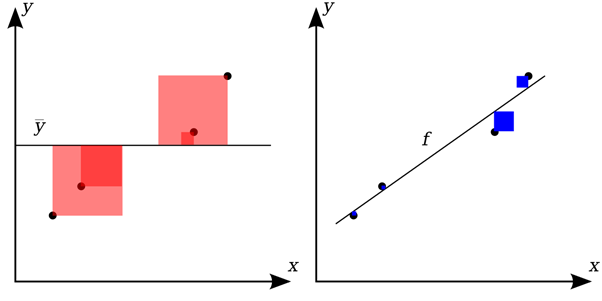


It is often used as a measure of the goodness of fit and it can work well in this situation, however it has some flaws that you should be aware of:

In [28]:
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (6.0, 6.0)

In [89]:
def fit_and_plot(data, color=None, order = 1):
    """A helper function to fit a linear model to the data and show it's r^2 value
    """
    plt.scatter(data['x'], data['y'], c = color)
    ax = plt.gca()
    ax.axis('equal')
    ax.set_xlim(0,None)
    ax.set_ylim(0,None)
    formula = 'y ~ x' + ''.join([f' + np.power(x, {power})' for power in range(2,order)])
    result = smf.ols(formula=formula, data=data).fit()
    label = f'R^2 = {result.rsquared:.3f}'
    x_max = np.max(data['x'])
    pred_x = np.linspace(np.min(data['x']), np.max(data['x']), 200)
    pred_y = result.predict(pd.DataFrame({'x':pred_x}))
    plt.plot(pred_x, pred_y, c = color, label=label)
    plt.legend()
    return result

show examples of r^2 working

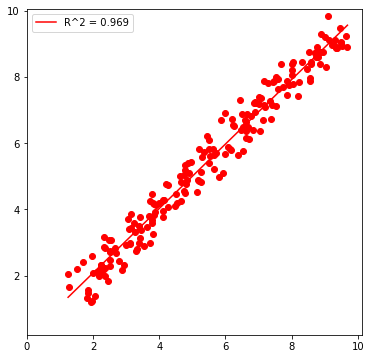

In [90]:
# high r**2 good corelation
x = np.linspace(1,9, 200)
y = x+np.random.rand(x.size)
x += np.random.rand(x.size)
data = pd.DataFrame({'x':x, 'y':y})
fit_and_plot(data, 'r')
fig = plt.gcf()
fig.savefig('HighR^2.png', dpi = 600)

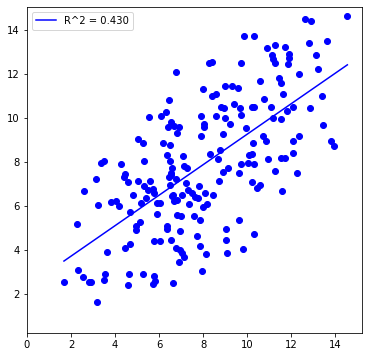

In [91]:
x = np.linspace(1,9, 200)
y = x+np.random.rand(x.size)*6
x += np.random.rand(x.size)*6
data = pd.DataFrame({'x':x, 'y':y})
fit_and_plot(data, 'b')
fig = plt.gcf()
fig.savefig('LowR^2.png', dpi = 600)

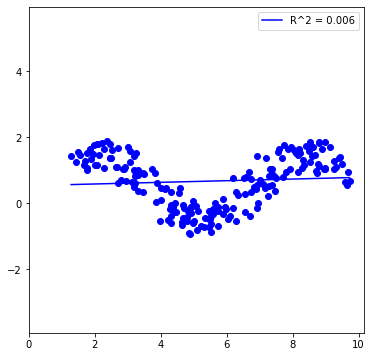

In [92]:
x = np.linspace(1,9, 200)
y = np.sin(x)+np.random.rand(x.size)
x += np.random.rand(x.size)
data = pd.DataFrame({'x':x, 'y':y})
fit_and_plot(data, 'b')
fig = plt.gcf()
fig.savefig('misleadingR^2-1.png', dpi = 600)

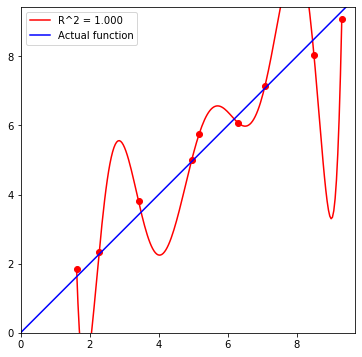

In [100]:
x = np.linspace(1,9, 9)
y = x+np.random.rand(x.size)
x += np.random.rand(x.size)
data = pd.DataFrame({'x':x, 'y':y})
results = fit_and_plot(data, 'r', 9)
plt.plot([0,10], [0,10], c='b', label='Actual function')
plt.gca().legend()
fig = plt.gcf()
fig.savefig('misleadingR^2-2.png', dpi = 600)

In [40]:
def make_data(height_diff, length=100):
    """ Makes fake data, two groups split by 20 in x and height_diff in y
    """
    x = np.random.randn(length) + 5
    y = np.random.randn(length) + 5 - x
    x[:length//2] += 20
    y[:length//2] += height_diff
    return pd.DataFrame({'x':x, 'y':y})
    

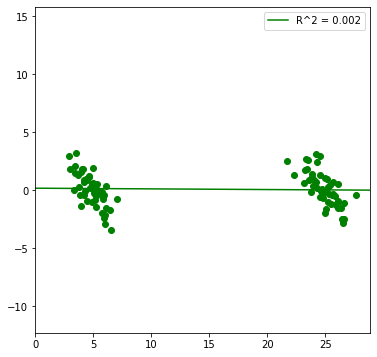

In [47]:
data = make_data(0)
result = fit_and_plot(data, 'g')
fig = plt.gcf()
fig.savefig('example-1-1.png', dpi = 600)

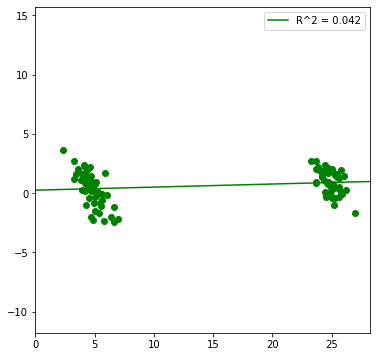

In [48]:
data = make_data(1)
result = fit_and_plot(data, 'g')
fig = plt.gcf()
fig.savefig('example-1-2.png', dpi = 600)

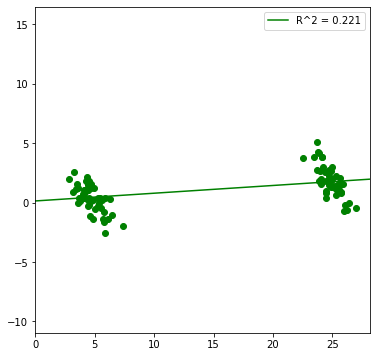

In [49]:
data = make_data(2)
result = fit_and_plot(data, 'g')
fig = plt.gcf()
fig.savefig('example-1-3.png', dpi = 600)

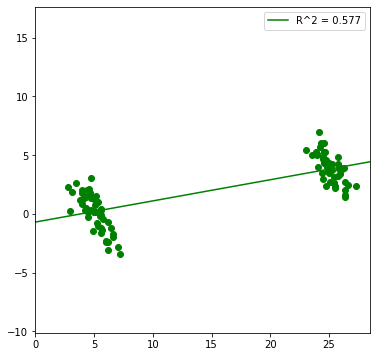

In [50]:
data = make_data(4)
result = fit_and_plot(data, 'g')
fig = plt.gcf()
fig.savefig('example-1-4.png', dpi = 600)

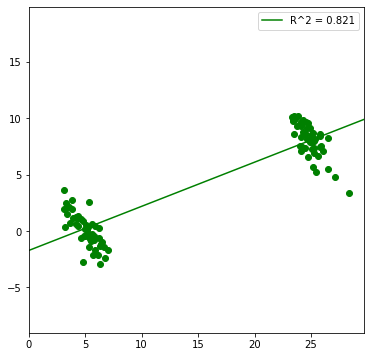

In [51]:
data = make_data(8)
result = fit_and_plot(data, 'g')
fig = plt.gcf()
fig.savefig('example-1-5.png', dpi = 600)

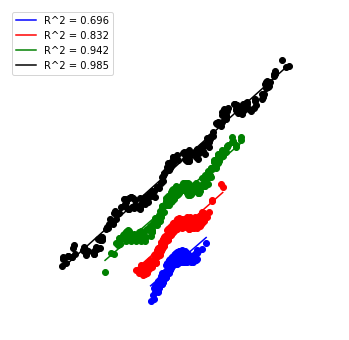

In [125]:
colors = 'brgk'
to_add = 0
start_range = [-0.5*np.pi, 0.5*np.pi]
for i in range(4):
    x = np.linspace(start_range[0],start_range[1], 200) + np.random.randn(x.size)
    y = 0.9*x + np.cos(x)+np.random.rand(x.size)*1.5 +to_add
    data = pd.DataFrame({'x':x, 'y':y})
    fit_and_plot(data, colors[i])
    start_range=[2*sr for sr in start_range]
    to_add+=4
    ax = plt.gca()
    ax.set_xlim(-20,20)
    ax.set_ylim(-7,32)
    ax.axis('off')
    ax.grid()
    fig = plt.gcf()
    fig.savefig(f'r^2_range_dependence{i}.png', dpi = 600)